<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor
* customer analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotnine as gg
from plotnine import ggplot, aes
import os
from datetime import datetime, date, time, timezone, timedelta

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, mean_squared_error
import sklearn.datasets as skd

# Regessor

In [8]:
raw = skd.load_breast_cancer()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']

In [10]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [13]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [18]:
fit_lg = LogisticRegression().fit(x_tr, y_tr)
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [19]:
fit_lg_std = LogisticRegression().fit(x_tr_std, y_tr)
fit_rf_std = RandomForestClassifier().fit(x_tr_std, y_tr)

In [20]:
pred_lg = fit_lg.predict(x_te)
pred_lg_std = fit_lg_std.predict(x_te_std)
pred_rf = fit_rf.predict(x_te)
pred_rf_std = fit_rf_std.predict(x_te_std)

prob_lg = fit_lg.predict_proba(x_te)[:,-1]
prob_lg_std = fit_lg_std.predict_proba(x_te_std)[:,-1]
prob_rf = fit_rf.predict_proba(x_te)[:,-1]
prob_rf_std = fit_rf_std.predict_proba(x_te_std)[:,-1]

In [21]:
accuracy_score(y_te, pred_lg), accuracy_score(y_te, pred_lg_std), accuracy_score(y_te, pred_rf), accuracy_score(y_te, pred_rf_std)

(0.9473684210526315,
 0.9649122807017544,
 0.9766081871345029,
 0.9649122807017544)

In [24]:
fpr_lg, tpr_lg, thr_1 = roc_curve(y_te, prob_lg)
fpr_lg_std, tpr_lg_std, thr_1 = roc_curve(y_te, prob_lg_std)
fpr_rf, tpr_rf, thr_1 = roc_curve(y_te, prob_rf)
fpr_rf_std, tpr_rf_std, thr_1 = roc_curve(y_te, prob_rf_std)

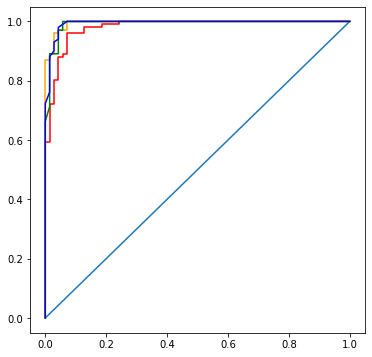

In [29]:
plt.figure(figsize = [6,6])
plt.plot([0,1], [0, 1])
plt.plot(fpr_lg, tpr_lg, color = 'red')
plt.plot(fpr_lg_std, tpr_lg_std, color = 'orange')
plt.plot(fpr_rf, tpr_rf, color = 'green')
plt.plot(fpr_rf_std, tpr_rf_std, color = 'blue')

# Customer Analysis

In [30]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'rfm_test.csv',
 'retail_data_response.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'retail_data_transactions.csv',
 'sample_data']

In [34]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.columns = [a.lower() for a in df.columns]
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [39]:
df = df[(~df['invoiceno'].str.contains('C')) & (df.country == 'United Kingdom') ]

In [40]:
df['date'] = pd.to_datetime(df['invoicedate'])
df['rev'] = df['quantity'] * df['unitprice']

In [41]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,date,rev
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


In [44]:
df = df[['customerid', 'date', 'rev']]
df = df.sort_values(['customerid', 'date'], ascending = [0, 1])
df.head()

,customerid,date,rev
198716,18287.0,2011-05-22 10:39:00,10.2
198717,18287.0,2011-05-22 10:39:00,10.2
198718,18287.0,2011-05-22 10:39:00,10.2
198719,18287.0,2011-05-22 10:39:00,15.0
198720,18287.0,2011-05-22 10:39:00,15.0


In [45]:
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df.head()

,customerid,date,rev,month
198716,18287.0,2011-05-22 10:39:00,10.2,2011-05-01
198717,18287.0,2011-05-22 10:39:00,10.2,2011-05-01
198718,18287.0,2011-05-22 10:39:00,10.2,2011-05-01
198719,18287.0,2011-05-22 10:39:00,15.0,2011-05-01
198720,18287.0,2011-05-22 10:39:00,15.0,2011-05-01


In [55]:
list_pu = df.groupby(['customerid', 'month']).first().reset_index()
list_npu = df.groupby(['customerid']).first().reset_index()

In [56]:
list_month = list_pu['month'].sort_values().unique()

In [71]:
for mon in list_month : 
  
  temp_npu = list_npu[list_npu['month'] == mon]
  temp_pu = list_pu[list_pu['customerid'].isin(temp_npu['customerid'])]
  temp = temp_pu.groupby(['month'])['rev'].count().reset_index().rename(columns = {'rev' : 'pu'})
  temp = temp.assign(npu_month = mon,
              num = [f'm{a:02d}' for a in range(1,len(temp) + 1)])
  temp = temp[['npu_month', 'num', 'pu']]

  if mon == list_month[0] :

    res = temp 

  else : 

    res = pd.concat([res, temp],axis = 0)

res.head()         

,npu_month,num,pu
0,2010-12-01,m01,815
1,2010-12-01,m02,289
2,2010-12-01,m03,263
3,2010-12-01,m04,304
4,2010-12-01,m05,293


In [72]:
pd.pivot_table(res, index = 'npu_month', columns = 'num', values = 'pu').reset_index()

num,npu_month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12,m13
0,2010-12-01,815.0,289.0,263.0,304.0,293.0,323.0,291.0,278.0,289.0,325.0,299.0,405.0,218.0
1,2011-01-01,358.0,76.0,93.0,84.0,119.0,99.0,90.0,87.0,108.0,117.0,127.0,43.0,NaN
2,2011-02-01,340.0,64.0,66.0,97.0,98.0,86.0,87.0,96.0,90.0,104.0,25.0,NaN,NaN
3,2011-03-01,419.0,64.0,109.0,83.0,94.0,69.0,111.0,96.0,119.0,38.0,NaN,NaN,NaN
4,2011-04-01,277.0,58.0,56.0,60.0,56.0,61.0,61.0,73.0,20.0,NaN,NaN,NaN,NaN
5,2011-05-01,256.0,48.0,44.0,44.0,53.0,58.0,68.0,23.0,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,214.0,38.0,31.0,51.0,51.0,69.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,169.0,30.0,33.0,39.0,47.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,141.0,32.0,32.0,34.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,276.0,63.0,83.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
res2 = res.assign(ratio = res.groupby(['npu_month'])['pu'].apply(lambda x : x/x.max()))
res2.head()

,npu_month,num,pu,ratio
0,2010-12-01,m01,815,1.000000
1,2010-12-01,m02,289,0.354601
2,2010-12-01,m03,263,0.322699
3,2010-12-01,m04,304,0.373006
4,2010-12-01,m05,293,0.359509


In [78]:
pd.pivot_table(res2, index = 'npu_month', columns = 'num', values = 'ratio').reset_index()

num,npu_month,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12,m13
0,2010-12-01,1.0,0.354601,0.322699,0.373006,0.359509,0.396319,0.357055,0.341104,0.354601,0.398773,0.366871,0.496933,0.267485
1,2011-01-01,1.0,0.212291,0.259777,0.234637,0.332402,0.276536,0.251397,0.243017,0.301676,0.326816,0.354749,0.120112,NaN
2,2011-02-01,1.0,0.188235,0.194118,0.285294,0.288235,0.252941,0.255882,0.282353,0.264706,0.305882,0.073529,NaN,NaN
3,2011-03-01,1.0,0.152745,0.260143,0.198091,0.224344,0.164678,0.264916,0.229117,0.284010,0.090692,NaN,NaN,NaN
4,2011-04-01,1.0,0.209386,0.202166,0.216606,0.202166,0.220217,0.220217,0.263538,0.072202,NaN,NaN,NaN,NaN
5,2011-05-01,1.0,0.187500,0.171875,0.171875,0.207031,0.226562,0.265625,0.089844,NaN,NaN,NaN,NaN,NaN
6,2011-06-01,1.0,0.177570,0.144860,0.238318,0.238318,0.322430,0.098131,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-07-01,1.0,0.177515,0.195266,0.230769,0.278107,0.106509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-08-01,1.0,0.226950,0.226950,0.241135,0.120567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-09-01,1.0,0.228261,0.300725,0.115942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


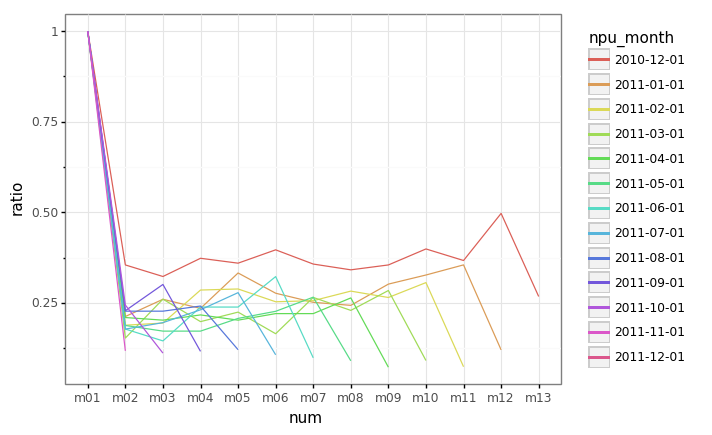

<ggplot: (8750234289405)>

In [82]:
(
    ggplot(res2.assign(npu_month = res2.npu_month.astype(str)), 
           aes('num', 'ratio', color = 'npu_month', group = 'npu_month')) +
    gg.geom_line() +
    gg.theme_bw()
)